In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import pandas_datareader as web
import pandas as pd

In [2]:
#choose the range of the dates


start=dt.datetime(2015,1,1)
end=dt.datetime(2021,6,30)

In [3]:
#choose the company

company='MSFT'


data=web.DataReader(company, 'yahoo',start,end)

In [4]:

data1= data.reset_index()


In [5]:
data1

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,41.348206
1,2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,40.967976
2,2015-01-06,46.750000,45.540001,46.380001,45.650002,36447900.0,40.366688
3,2015-01-07,46.459999,45.490002,45.980000,46.230000,29114100.0,40.879539
4,2015-01-08,47.750000,46.720001,46.750000,47.590000,29645200.0,42.082142
...,...,...,...,...,...,...,...
1627,2021-06-21,263.519989,257.920013,259.820007,262.630005,26696100.0,262.630005
1628,2021-06-22,265.790009,262.399994,262.720001,265.510010,24694100.0,265.510010
1629,2021-06-23,266.829987,264.429993,265.989990,265.269989,19518700.0,265.269989
1630,2021-06-24,267.850006,265.470001,266.160004,266.690002,21446900.0,266.690002


In [6]:
data2=data1[['Date','Close']]

In [7]:
data2

,Date,Close
0,2015-01-02,46.759998
1,2015-01-05,46.330002
2,2015-01-06,45.650002
3,2015-01-07,46.230000
4,2015-01-08,47.590000
...,...,...
1627,2021-06-21,262.630005
1628,2021-06-22,265.510010
1629,2021-06-23,265.269989
1630,2021-06-24,266.690002


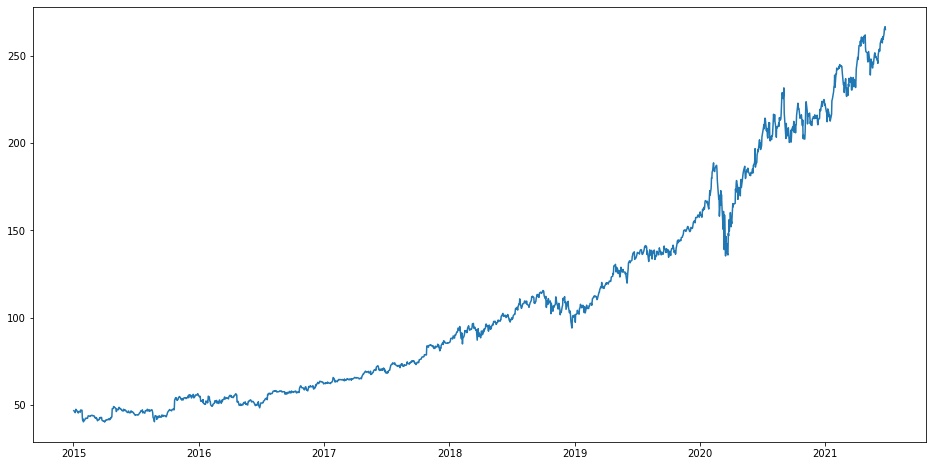

In [8]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'],label='xxxxxxx')

In [9]:
data2.head(1511)

,Date,Close
0,2015-01-02,46.759998
1,2015-01-05,46.330002
2,2015-01-06,45.650002
3,2015-01-07,46.230000
4,2015-01-08,47.590000
...,...,...
1506,2020-12-24,222.750000
1507,2020-12-28,224.960007
1508,2020-12-29,224.149994
1509,2020-12-30,221.679993


In [10]:

final_dataset_num=data2[['Close']]

#for testing we need real data - split into train data and test data
#try to predict the data of 2021 and compare it with the actual data (valid data)
#you need train and valid data for training the model

train_data=final_dataset_num[:1511]
valid_data=final_dataset_num[1511:]

new_dataset=data2
new_dataset.drop('Date',axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset_num)

#take the last 60 days and predict the very next day and then the 59 days after
prediction_days=50

x_train_data,y_train_data=[],[]

for i in range(prediction_days,len(train_data)):
    x_train_data.append(scaled_data[i-prediction_days:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)


x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
valid_data

,Close
1511,217.690002
1512,217.899994
1513,212.250000
1514,218.289993
1515,219.619995
...,...
1627,262.630005
1628,265.510010
1629,265.269989
1630,266.690002


In [12]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM, Dropout


In [13]:
import tensorflow as tf


In [14]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-prediction_days:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)



1461/1461 - 43s - loss: 0.0018


In [15]:
X_test=[]
for i in range(prediction_days,inputs_data.shape[0]):
    X_test.append(inputs_data[i-prediction_days:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [20]:
len(predicted_closing_price)

121

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


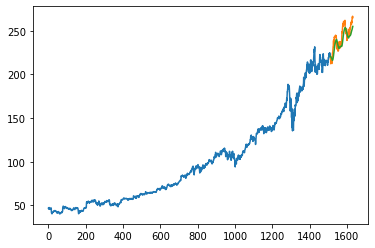

In [23]:
valid_data['Predictions']=predicted_closing_price #orange line
plt.plot(train_data["Close"])#green line
plt.plot(valid_data[['Close',"Predictions"]])

#the y axis are the rows not the year

In [18]:
mean_square_error=((valid_data['Close']-valid_data['Predictions'])**2)/len(valid_data)


In [4]:
mean_square_error


NameError: name 'mean_square_error' is not defined

In [3]:

mean_square_error.to_csv('predicition_MSFT')

NameError: name 'mean_square_error' is not defined